# LOAN PREDICTION

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import f1_score, accuracy_score
from xgboost import XGBClassifier
import joblib

In [ ]:
df = pd.read_csv(r"C:\Users\chira\OneDrive\Desktop\SEM 6\AOML\AOML project\LOAN approval Prediction.csv")
df['LoanAmount'].fillna(np.nanmedian(df['LoanAmount']), inplace=True)

### Label Encoding


In [3]:
categorical_cols = ['Gender', 'Dependents', 'Married', 'Education', 'Self_Employed', 'Credit_History']
encoder = LabelEncoder()
for col in categorical_cols:
    df[col] = encoder.fit_transform(df[col])

df['Loan_Status'] = encoder.fit_transform(df['Loan_Status'])



### TRAIN-TEST SPLIT


In [4]:
df.drop(['Loan_ID'], axis=1, inplace=True)

X = df.drop(['Loan_Status'], axis=1)
y = df['Loan_Status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=300)

print('Size of X_train :', X_train.shape)
print('Size of y_train :', y_train.shape)
print('Size of X_test :', X_test.shape)
print('Size of y_test :', y_test.shape)


Size of X_train : (491, 13)
Size of y_train : (491,)
Size of X_test : (123, 13)
Size of y_test : (123,)


## MODEL TRAINING

### XGBoost Classifier


In [5]:
param_grid = {
    'n_estimators': [100, 300, 500],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.3, 0.5],
    'reg_lambda': [1, 1.5, 2]
}

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
grid_search = GridSearchCV(xgb, param_grid, cv=5, scoring='f1', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 5184 candidates, totalling 25920 fits


c:\Users\91983\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:158: UserWarning: [15:32:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=...
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.6, 0.8, 1.0],
                         'gamma': [0, 0.1, 0.3, 0.5],
                         'learning_rate': [0.01, 0.05, 0.1, 0.2],
                         'max_depth': [3, 5, 7, 10],
                         'n_estimators': [100, 300, 500],
                         'reg_lambda': [1, 1.5, 2],
                         'subsample': [0.6, 0.8, 1.0]},
             scoring='f1', verbose=2)

In [7]:
tuned_xgb_model = grid_search.best_estimator_
tuned_xgb_preds = tuned_xgb_model.predict(X_test)
tuned_xgb_f1 = f1_score(y_test, tuned_xgb_preds)
tuned_xgb_acc = accuracy_score(y_test, tuned_xgb_preds)

In [8]:
# Save the best-tuned model
joblib.dump(tuned_xgb_model, "best_xgb_loan_model.h5")

# Print model performance
print(f"Best XGBoost - F1 Score: {tuned_xgb_f1}, Accuracy: {tuned_xgb_acc}")
print(f"Best Parameters: {grid_search.best_params_}")


Best XGBoost - F1 Score: 1.0, Accuracy: 1.0
Best Parameters: {'colsample_bytree': 0.6, 'gamma': 0, 'learning_rate': 0.01, 'max_depth': 10, 'n_estimators': 500, 'reg_lambda': 2, 'subsample': 1.0}


## Catboost


In [9]:
import pandas as pd
import numpy as np
import pickle
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
from catboost import CatBoostClassifier
import joblib



In [ ]:
df = pd.read_csv(r"C:\Users\chira\OneDrive\Desktop\SEM 6\AOML\AOML project\LOAN approval Prediction.csv")
df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)

C:\Users\91983\AppData\Local\Temp\ipykernel_16752\4215928485.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)


In [11]:
categorical_cols = ['Gender', 'Dependents', 'Married', 'Education', 'Self_Employed', 'Credit_History']
encoder = LabelEncoder()
for col in categorical_cols:
    df[col] = encoder.fit_transform(df[col])

df['Loan_Status'] = encoder.fit_transform(df['Loan_Status'])

In [12]:
dummy_data = pd.get_dummies(df['Property_Area'])
df = pd.concat([df, dummy_data], axis=1)
df.drop(['Property_Area'], axis=1, inplace=True)

In [13]:
df.drop(['Loan_ID'], axis=1, inplace=True)

In [14]:
X = df.drop(['Loan_Status'], axis=1)
y = df['Loan_Status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=300)

print('Size of X_train :', X_train.shape)
print('Size of y_train :', y_train.shape)
print('Size of X_test :', X_test.shape)
print('Size of y_test :', y_test.shape)

Size of X_train : (2000, 13)
Size of y_train : (2000,)
Size of X_test : (500, 13)
Size of y_test : (500,)


In [15]:
param_grid = {
    'iterations': [100, 300, 500],
    'depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'l2_leaf_reg': [1, 3, 5, 7],
    'border_count': [32, 50, 100]
}

In [16]:
catboost = CatBoostClassifier(verbose=0)
grid_search = GridSearchCV(catboost, param_grid, cv=5, scoring='f1', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 576 candidates, totalling 2880 fits


GridSearchCV(cv=5,
             estimator=<catboost.core.CatBoostClassifier object at 0x00000234EC62E8C0>,
             n_jobs=-1,
             param_grid={'border_count': [32, 50, 100], 'depth': [3, 5, 7, 10],
                         'iterations': [100, 300, 500],
                         'l2_leaf_reg': [1, 3, 5, 7],
                         'learning_rate': [0.01, 0.05, 0.1, 0.2]},
             scoring='f1', verbose=2)

In [17]:
tuned_catboost_model = grid_search.best_estimator_
tuned_catboost_preds = tuned_catboost_model.predict(X_test)
tuned_catboost_f1 = f1_score(y_test, tuned_catboost_preds)
tuned_catboost_acc = accuracy_score(y_test, tuned_catboost_preds)
tuned_catboost_precision = precision_score(y_test, tuned_catboost_preds)
tuned_catboost_recall = recall_score(y_test, tuned_catboost_preds)

In [18]:
# Save the best-tuned model using pickle
filename = 'CatBoost_Classifier.model'
with open(filename, 'wb') as file:
    pickle.dump(tuned_catboost_model, file)

# Print model performance
print(f"Best CatBoost - F1 Score: {tuned_catboost_f1}, Accuracy: {tuned_catboost_acc}, Precision: {tuned_catboost_precision}, Recall: {tuned_catboost_recall}")
print(f"Best Parameters: {grid_search.best_params_}")

Best CatBoost - F1 Score: 1.0, Accuracy: 1.0, Precision: 1.0, Recall: 1.0
Best Parameters: {'border_count': 100, 'depth': 3, 'iterations': 100, 'l2_leaf_reg': 1, 'learning_rate': 0.01}


## KNN Model

In [ ]:
import pandas as pd
import numpy as np
import pickle
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
from sklearn.preprocessing import StandardScaler

In [ ]:
df = pd.read_csv(r"C:\Users\chira\OneDrive\Desktop\SEM 6\AOML\AOML project\LOAN approval Prediction.csv")

df.fillna(df.median(numeric_only=True), inplace=True)

In [ ]:
# Encoding categorical variables
categorical_cols = ['Gender', 'Dependents', 'Married', 'Education', 'Self_Employed', 'Credit_History']
for col in categorical_cols:
    df[col] = df[col].astype('category').cat.codes

df['Loan_Status'] = df['Loan_Status'].astype('category').cat.codes

# One-hot encoding for Property_Area
dummy_data = pd.get_dummies(df['Property_Area'])
df = pd.concat([df, dummy_data], axis=1)
df.drop(['Property_Area'], axis=1, inplace=True)

In [ ]:
df.drop(['Loan_ID'], axis=1, inplace=True)

selected_features = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Gender', 'Married', 'Education', 'Self_Employed', 'Dependents', 'Semiurban', 'Urban', 'Rural']
X = df[selected_features]
y = df['Loan_Status']


In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=300)

# Print dataset sizes
print('Size of X_train :', X_train.shape)
print('Size of y_train :', y_train.shape)
print('Size of X_test :', X_test.shape)
print('Size of y_test :', y_test.shape)

In [ ]:
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

knn_classifier = KNeighborsClassifier()
grid_search_knn = GridSearchCV(knn_classifier, param_grid_knn, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)
grid_search_knn.fit(X_train, y_train)

# Best KNN model
tuned_knn_model = grid_search_knn.best_estimator_
tuned_knn_preds = tuned_knn_model.predict(X_test)
tuned_knn_f1 = f1_score(y_test, tuned_knn_preds)
tuned_knn_acc = accuracy_score(y_test, tuned_knn_preds)
tuned_knn_precision = precision_score(y_test, tuned_knn_preds)
tuned_knn_recall = recall_score(y_test, tuned_knn_preds)

In [ ]:

print(f'Optimized KNN Classifier - F1 Score: {tuned_knn_f1}, Accuracy: {tuned_knn_acc}, Precision: {tuned_knn_precision}, Recall: {tuned_knn_recall}')
print(f'Best Parameters: {grid_search_knn.best_params_}')

# Saving Optimized KNN Model Using Pickle
filename_knn = 'KNN_Classifier_Optimized2.model'
with open(filename_knn, 'wb') as file:
    pickle.dump(tuned_knn_model, file)


Size of X_train : (2000, 13)
Size of y_train : (2000,)
Size of X_test : (500, 13)
Size of y_test : (500,)
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Optimized KNN Classifier - F1 Score: 0.9794437726723095, Accuracy: 0.966, Precision: 0.9619952494061758, Recall: 0.9975369458128078
Best Parameters: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'uniform'}


## RANDOM FOREST MODEL

In [ ]:
import pandas as pd
import numpy as np
import pickle
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
from sklearn.preprocessing import StandardScaler


In [ ]:

# Load the dataset
df = pd.read_csv(r"C:\Users\chira\OneDrive\Desktop\SEM 6\AOML\AOML project\LOAN approval Prediction.csv")

# Handling missing values
df.fillna(df.median(numeric_only=True), inplace=True)

# Encoding categorical variables
categorical_cols = ['Gender', 'Dependents', 'Married', 'Education', 'Self_Employed', 'Credit_History']
for col in categorical_cols:
    df[col] = df[col].astype('category').cat.codes

df['Loan_Status'] = df['Loan_Status'].astype('category').cat.codes

In [ ]:
# One-hot encoding for Property_Area
dummy_data = pd.get_dummies(df['Property_Area'])
df = pd.concat([df, dummy_data], axis=1)
df.drop(['Property_Area'], axis=1, inplace=True)

# Drop Loan_ID column
df.drop(['Loan_ID'], axis=1, inplace=True)

# Selecting 13 features for consistency
selected_features = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Gender', 'Married', 'Education', 'Self_Employed', 'Dependents', 'Semiurban', 'Urban', 'Rural']
X = df[selected_features]
y = df['Loan_Status']

In [ ]:
# Feature Scaling
scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=300)

# Print dataset sizes
print('Size of X_train :', X_train.shape)
print('Size of y_train :', y_train.shape)
print('Size of X_test :', X_test.shape)
print('Size of y_test :', y_test.shape)


In [ ]:
# Train Random Forest Model
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=300)
rf_classifier.fit(X_train, y_train)

# Predictions
rf_preds = rf_classifier.predict(X_test)
rf_f1 = f1_score(y_test, rf_preds)
rf_acc = accuracy_score(y_test, rf_preds)
rf_precision = precision_score(y_test, rf_preds)
rf_recall = recall_score(y_test, rf_preds)

In [ ]:
print(f'Random Forest Classifier - F1 Score: {rf_f1}, Accuracy: {rf_acc}, Precision: {rf_precision}, Recall: {rf_recall}')

# Saving Random Forest Model Using Pickle
filename_rf = 'RandomForest_Classifier.model'
with open(filename_rf, 'wb') as file:
    pickle.dump(rf_classifier, file)

Size of X_train : (2000, 13)
Size of y_train : (2000,)
Size of X_test : (500, 13)
Size of y_test : (500,)
Random Forest Classifier - F1 Score: 1.0, Accuracy: 1.0, Precision: 1.0, Recall: 1.0


## DECISION TREE MODEL

In [9]:
depths_f1_score = []
depths_test_f1_score = []
depths_test_acc_score = []

In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, accuracy_score
from sklearn.model_selection import cross_val_score
d_val = []
for d in range(1,30):
    dt_classifier = DecisionTreeClassifier(random_state=300, max_depth=d)
    dt_classifier.fit(X_train, y_train)
    dt_f1_score = np.mean(cross_val_score(dt_classifier, X_train, y_train, scoring='f1', cv=5))
    depths_f1_score.append(dt_f1_score)
    d_val.append(d)
    
    predictions = dt_classifier.predict(X_test)
    # Caculating F1 Score
    dt_test_f1_score = f1_score(y_test, predictions)
    dt_test_acc_score = accuracy_score(y_test, predictions)
    
    depths_test_f1_score.append(dt_test_f1_score)
    depths_test_acc_score.append(dt_test_acc_score)

In [13]:
dt_classifier = DecisionTreeClassifier(random_state=300, max_depth=4)
dt_classifier.fit(X_train, y_train)
dt_f1_score = np.mean(cross_val_score(dt_classifier, X_train, y_train, scoring='f1', cv=5))

predictions = dt_classifier.predict(X_test)
# Caculating F1 Score
dt_test_f1_score = f1_score(y_test, predictions)
dt_test_acc_score = accuracy_score(y_test, predictions)

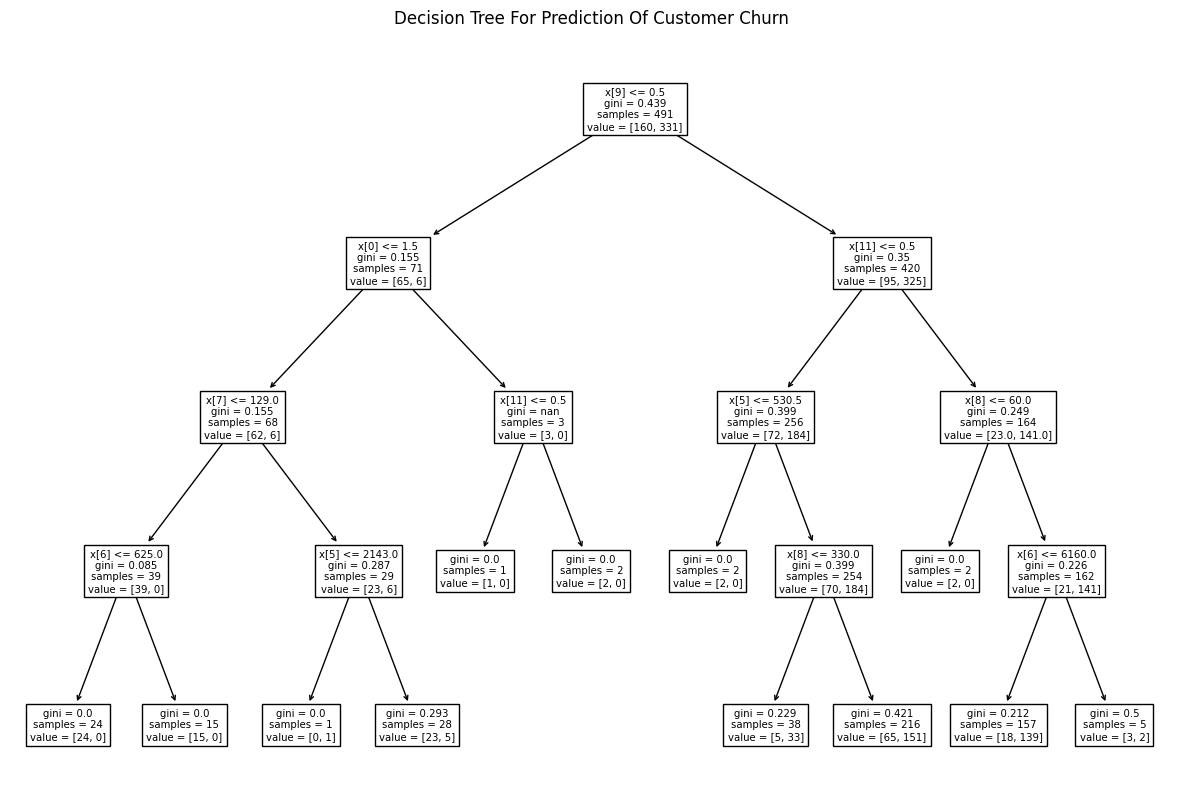

In [15]:
from matplotlib import pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(15,10))
plot_tree(dt_classifier)
plt.title('Decision Tree For Prediction Of Customer Churn')
plt.show()

In [ ]:
# Saving Decision Tree Model Using Pickle
import pickle
filename = 'Decison_Tree_Classifier.model'
with open(filename, 'wb') as file:
    pickle.dump(dt_classifier, file)

### LIGHTGBM MODEL

In [ ]:
import pandas as pd
import numpy as np
import lightgbm as lgb
import joblib
import optuna
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import StackingClassifier, RandomForestClassifier


# ---- 🔹 KNN Imputation Function ----
def KNN_Imputer(df):
    for col in df.columns:
        if df[col].isna().sum() == 0:
            continue

        temp_df = df.copy()
        for x in df.columns:
            if x == col:
                continue
            temp_df[x].fillna(value=temp_df[x].mean(), inplace=True)

        other_cols = [x for x in df.columns if x != col]
        X = temp_df[other_cols][df[col].notna()]
        y = temp_df[col][df[col].notna()]

        neigh = KNeighborsRegressor(n_neighbors=3)
        neigh.fit(np.array(X), np.array(y))

        print(f"🔹 Imputing {col}")
        df.loc[df[col].isnull(), col] = neigh.predict(temp_df[other_cols][df[col].isnull()])
    
    return df


# ---- 🔹 Load Dataset ----
df = pd.read_csv(r"C:\Users\chira\OneDrive\Desktop\SEM 6\AOML\AOML project\LOAN approval Prediction.csv")

# Drop Loan_ID
df.drop(columns=["Loan_ID"], inplace=True)

# Convert categorical variables
df["Gender"] = df["Gender"].map({"Male": 1, "Female": 0})
df["Married"] = df["Married"].map({"Yes": 1, "No": 0})
df["Education"] = df["Education"].map({"Graduate": 1, "Not Graduate": 0})
df["Self_Employed"] = df["Self_Employed"].map({"Yes": 1, "No": 0})

# Handle "Dependents" column (convert "3+" to integer 3)
df["Dependents"] = df["Dependents"].replace("3+", 3).astype(float)

# One-hot encode "Property_Area"
df = pd.get_dummies(df, columns=["Property_Area"], drop_first=True)

# Convert "Loan_Status" to binary (Y=1, N=0)
df["Loan_Status"] = df["Loan_Status"].map({"Y": 1, "N": 0})

# Apply KNN Imputation
df = KNN_Imputer(df)

# Define input features (X) and target (y)
X = df.drop(columns=["Loan_Status"])
y = df["Loan_Status"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# ---- 🔹 OPTUNA HYPERPARAMETER TUNING ----
def objective(trial):
    params = {
        "objective": "binary",
        "metric": "binary_error",
        "boosting_type": "gbdt",
        "num_leaves": trial.suggest_int("num_leaves", 20, 200),
        "min_data_in_leaf": trial.suggest_int("min_data_in_leaf", 10, 100),
        "feature_fraction": trial.suggest_float("feature_fraction", 0.4, 1.0),
        "bagging_fraction": trial.suggest_float("bagging_fraction", 0.4, 1.0),
        "bagging_freq": trial.suggest_int("bagging_freq", 1, 7),
        "lambda_l1": trial.suggest_float("lambda_l1", 1e-8, 10.0, log=True),
        "lambda_l2": trial.suggest_float("lambda_l2", 1e-8, 10.0, log=True),
        "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.3),
        "max_depth": trial.suggest_int("max_depth", 3, 15),
    }

    model = lgb.LGBMClassifier(**params, random_state=42)
    model.fit(
        X_train, y_train,
        eval_set=[(X_test, y_test)],
        callbacks=[lgb.early_stopping(50)],
        verbose=False
    )

    y_pred = model.predict(X_test)
    return 1 - accuracy_score(y_test, y_pred)


# Run Optuna to find the best hyperparameters
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=50)

# Get best parameters
best_params = study.best_params
best_params.update({
    "objective": "binary",
    "metric": "binary_error",
    "verbosity": -1,
    "boosting_type": "gbdt"
})

# ---- 🔹 TRAIN FINAL LIGHTGBM MODEL ----
lgb_model = lgb.LGBMClassifier(**best_params, random_state=42)
lgb_model.fit(
    X_train, y_train,
    eval_set=[(X_test, y_test)],
    callbacks=[lgb.early_stopping(50)],
    verbose=True
)

# Predictions
y_pred = lgb_model.predict(X_test)
lgb_accuracy = accuracy_score(y_test, y_pred)
print(f"✅ LightGBM Model Accuracy: {lgb_accuracy:.4f}")


# ---- 🔹 STACKING CLASSIFIER ----
estimators = [
    ("lgb", lgb.LGBMClassifier(**best_params)),
    ("rf", RandomForestClassifier(max_depth=32, random_state=1)),
]

stacker = StackingClassifier(estimators=estimators, final_estimator=RandomForestClassifier(), cv=5)
stacker.fit(X_train, y_train)

# Stacking Predictions
stacker_pred = stacker.predict(X_test)
stacker_accuracy = accuracy_score(y_test, stacker_pred)

print(f"🚀 Stacking Model Accuracy: {stacker_accuracy:.4f}")
print(f"🌟 LightGBM Model Accuracy: {lgb_accuracy:.4f}")

# Save models
joblib.dump(lgb_model, "LightGBM_Optimized.model")
joblib.dump(stacker, "Stacking_Optimized.model")
joblib.dump(scaler, "Scaler.model")

print("🎉 Models and scaler saved successfully!")


## CREATING VOTING CLASSIFIER (ENSEMBLE MODEL)

In [ ]:
import joblib
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_score, train_test_split
import pandas as pd
import numpy as np

# Load all trained models
models = {
    "KNN": joblib.load("KNN_classifier.model"),
    "Decision Tree": joblib.load("Decison_Tree_Classifier.model"),
    "Random Forest": joblib.load("Random_Forest_Classifier.model"),
    "XGBoost": joblib.load("best_xgb_loan_model (1).h5"),
    "CATBoost": joblib.load("CatBoost_classifier (1).model"),
    "LightGBM": joblib.load("LightGBM_Optimized.model"),
    
}

# Load your dataset
df = pd.read_csv("your_dataset.csv")  # Replace with actual dataset
X = df.drop(columns=["default_status"])  # Adjust target column accordingly
y = df["default_status"]

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the Voting Classifier using pre-loaded models
voting_clf = VotingClassifier(
    estimators=[
        ("knn", models["KNN"]),
        ("dt", models["Decision Tree"]),
        ("rf", models["Random Forest"]),
        ("xgb", models["XGBoost"]),
        ("cat", models["CATBoost"]),
        ("lgbm", models["LightGBM"])
    ],
    voting="soft"  # Change to "hard" if majority voting is preferred
)

# Train the ensemble model
voting_clf.fit(X_train, y_train)

# Evaluate using cross-validation
cv_scores = cross_val_score(voting_clf, X_train, y_train, cv=5, scoring="accuracy")
print(f"Cross-validation accuracy: {cv_scores.mean():.4f}")

# Test accuracy
test_score = voting_clf.score(X_test, y_test)
print(f"Test Accuracy: {test_score:.4f}")

# Save the ensemble model
joblib.dump(voting_clf, "Ensemble.model")
